# <center> The McCall Model <center>
**McCall model** is an optimization function given by the equation:
$$V(w) = max \left\{\dfrac{w}{1-\beta}, b + \displaystyle \int_{\underline{w}}^{\bar{w}} V(w)dF(w) \right \}$$
Where,<br> 
    V(w) is the lifetime value of accepting an employment<br>
    F(w) is the probability distribution of possible wages, which in case of this problem is uniformly distributed as $w\in[2, 10]$<br>
    b is the unemployement benefit, and <br>
    $\beta$ is the discount rate<br>
    
    The equation can be solved iteratively as given below:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

[ 2.          2.42105263  2.84210526  3.26315789  3.68421053  4.10526316
  4.52631579  4.94736842  5.36842105  5.78947368  6.21052632  6.63157895
  7.05263158  7.47368421  7.89473684  8.31578947  8.73684211  9.15789474
  9.57894737 10.        ]


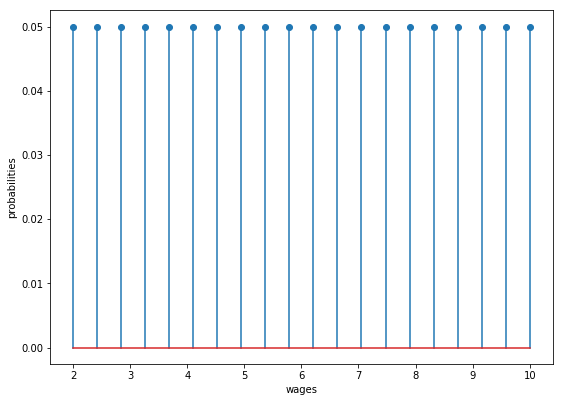

In [3]:
#Create a list of 20 wages between the value 2 and 10 
wages = np.linspace(2,10,20)
print(wages)
#Create an array of probabilities according to uniform distribution
probabilities = np.full(20, fill_value = 1./20.)

#Plot the probabilities and wages
fig, ax = plt.subplots(figsize=(9, 6.5))
ax.stem(wages, probabilities)
ax.set_xlabel('wages')
ax.set_ylabel('probabilities')

plt.show()

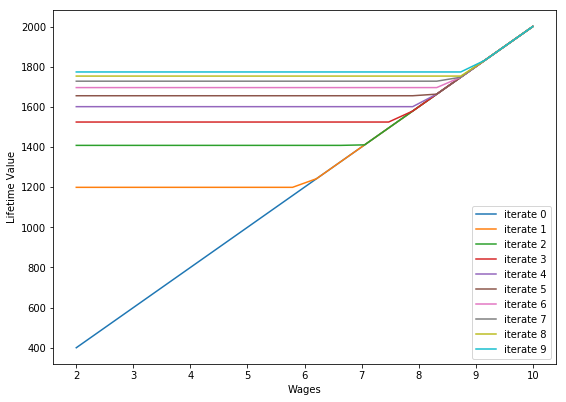

In [6]:
def plot_wage_vs_value(ax,
                        c=5,
                        β=0.995,
                        wages=wages,
                        probabilities=probabilities,
                        num_plots=10):

    v = wages / (1-β)
    v_next = np.empty_like(v)
    for i in range(num_plots):
        ax.plot(wages, v, label=f"iterate {i}")
        # Update guess
        for j, w in enumerate(wages):
            stop_val = w / (1 - β)
            cont_val = c + β * np.sum(v * probabilities)
            v_next[j] = max(stop_val, cont_val)
        v[:] = v_next

    ax.legend(loc='lower right')


fig, ax = plt.subplots(figsize=(9, 6.5))
plt.xlabel('Wages')
plt.ylabel('Lifetime Value')
plot_wage_vs_value(ax)
plt.show()

In [7]:
def reservation_wage(c,
                      β=0.995,
                      wages=wages,
                      probabilities=probabilities,
                      max_iter=1000,
                      tol=1e-6):

    # == First compute the value function == #

    v = wages / (1 - β)
    v_next = np.empty_like(v)
    i = 0
    error = tol + 1
    while i < max_iter and error > tol:

        for j, w in enumerate(wages):
            accept_job = w / (1 - β)
            reject_job = c + β * np.sum(v * probabilities)
            v_next[j] = max(accept_job, reject_job)

        error = np.linalg.norm(v_next - v)
        i += 1

        v[:] = v_next  

    return (1 - β) * (c + β * np.sum(v * probabilities))

In [9]:
reservation_wage(1)

9.368924695702415

In [11]:
benefit = []
reservation = []
for i in range (10):
    benefit.append(i)
    reservation.append(reservation_wage(i))
    

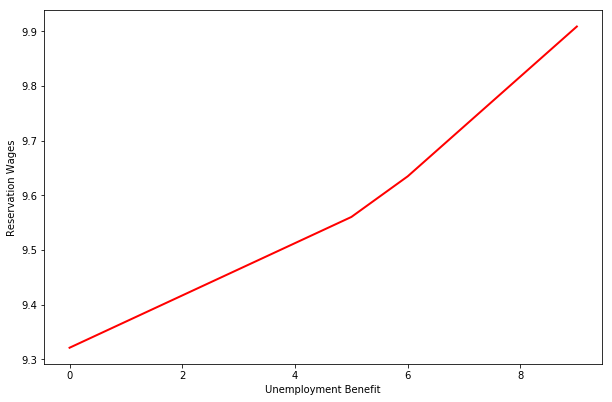

In [12]:
plt.figure(figsize=(10,6.5))
plot = plt.plot(benefit, reservation)
plt.setp(plot, color='r', linewidth=2.0)
plt.xlabel('Unemployment Benefit')
plt.ylabel ('Reservation Wages')
plt.show()